<a href="https://colab.research.google.com/github/hkbu-kennycheng/comp3115/blob/main/comp3115_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP3115 Case study using data from `data.gov.hk`

https://data.gov.hk/en-data/dataset/hk-dh-chpsebcddr-novel-infectious-agent

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9kYXRhLmdvdi5oay9lbi1kYXRhL2RhdGFzZXQvaGstZGgtY2hwc2ViY2Rkci1ub3ZlbC1pbmZlY3Rpb3VzLWFnZW50)

In [ ]:
!pip install requests pandas numpy seaborn tqdm

In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns

# Mode of detection of cases tested positive for SARS-CoV-2 virus in Hong Kong

https://data.gov.hk/en-data/dataset/hk-dh-chpsebcddr-novel-infectious-agent/resource/fc588358-e16a-4b81-a2ef-f8a87a81b0a2

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9kYXRhLmdvdi5oay9lbi1kYXRhL2RhdGFzZXQvaGstZGgtY2hwc2ViY2Rkci1ub3ZlbC1pbmZlY3Rpb3VzLWFnZW50L3Jlc291cmNlL2ZjNTg4MzU4LWUxNmEtNGI4MS1hMmVmLWY4YTg3YTgxYjBhMg==)

### Historical Data API

Inside, the page there is a date range select for users to generate API links for different CSV data. Each CSV file contains a single day data.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9kYXRhLmdvdi5oay9lbi1kYXRhL2RhdGFzZXQvaGstZGgtY2hwc2ViY2Rkci1ub3ZlbC1pbmZlY3Rpb3VzLWFnZW50L3Jlc291cmNlL2ZjNTg4MzU4LWUxNmEtNGI4MS1hMmVmLWY4YTg3YTgxYjBhMiNhcGktYXJlYQ==)

https://api.data.gov.hk/v1/historical-archive/list-file-versions?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Fmode_of_detection_eng.csv&start=20220301&end=20220302

Above link is the AJAX url to generate the links. The result JSON structure not very complex. Which would produce the following result.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9hcGkuZGF0YS5nb3YuaGsvdjEvaGlzdG9yaWNhbC1hcmNoaXZlL2xpc3QtZmlsZS12ZXJzaW9ucz91cmw9aHR0cDovL3d3dy5jaHAuZ292LmhrL2ZpbGVzL21pc2MvZW5oYW5jZWRfc3VyX2NvdmlkXzE5X2VuZy5jc3Ymc3RhcnQ9MjAyMjAzMDImZW5kPTIwMjIwMzAy&h=200)

Here is the result when you click on the `Next` button


https://api.data.gov.hk/v1/historical-archive/get-file?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Fmode_of_detection_eng.csv&time=20220302-0937

You may notice that, the API link just append `&time=20220302-0937` with the value of timestamp from previos JSON file to the csv file link.

Let's make a function to generate those API links. The earliest data is from `20200429`, and the latest data is on yesterday. We could use `strftime` to format time into corresponding date string.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9kb2NzLnB5dGhvbi5vcmcvMy9saWJyYXJ5L3RpbWUuaHRtbCN0aW1lLnN0cmZ0aW1l)

In [ ]:
from time import gmtime, strftime, time

def generateAPILinks(start = '20200429', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Fmode_of_detection_eng.csv&start={start}&end={end}')
  json = response.json()
  return ['https://api.data.gov.hk/v1/historical-archive/get-file?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Fmode_of_detection_eng.csv&time=' + t for t in json['timestamps']]

In [ ]:
urls = generateAPILinks()
len(urls)

628

In [ ]:
urls[0]

'https://api.data.gov.hk/v1/historical-archive/get-file?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Fmode_of_detection_eng.csv&time=20200429-0931'

## Processing CSV file directly from URL

In [ ]:
df = pd.read_csv(urls[0], index_col=1)
df

,Category number,Number of cases
Category name,,
Cases fulfilling the reporting criteria of COVID-19,1,344
Enhanced laboratory surveillance in public hospitals,2,49
Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,3,127
Diagnosis / Enhanced surveillance in private hospitals and clinics,4,89
Medical surveillance / Contact tracing by the Centre for Health Protection,5,187
Enhanced surveillance for asymptomatic inbound travelers,6,242


In latest data, there also a column for `number of cases in the past 4 weeks`.

In [67]:
df = pd.read_csv(urls[-1], index_col=1)
df

,Category number,Number of cases,Number of cases in the past 4 weeks
Category name,,,
Cases fulfilling the reporting criteria of COVID-19,1,336,0
Enhanced laboratory surveillance in public hospitals,2,891,150
Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,3,6231,3557
Diagnosis / Enhanced surveillance in private hospitals and clinics,4,2038,649
Medical surveillance / contact tracing by Centre for Health Protection,5,5923,700
Enhanced surveillance for asymptomatic inbound travelers,6,2138,118
Enhanced surveillance for persons with higher risk of exposure,7,49,22
Private testing for the targeted groups,8,98,0
Universal Community Testing Programme,9,32,0


### Dropping uncommon columns

In [68]:
df.drop(columns=['Category number', 'Number of cases in the past 4 weeks'], inplace=True)
df

,Number of cases
Category name,
Cases fulfilling the reporting criteria of COVID-19,336
Enhanced laboratory surveillance in public hospitals,891
Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,6231
Diagnosis / Enhanced surveillance in private hospitals and clinics,2038
Medical surveillance / contact tracing by Centre for Health Protection,5923
Enhanced surveillance for asymptomatic inbound travelers,2138
Enhanced surveillance for persons with higher risk of exposure,49
Private testing for the targeted groups,98
Universal Community Testing Programme,32


### Rename `Number of cases` to the date of record

We could also get the date from URL and rename the column.

In [ ]:
urls[0][-13:-5]

'20200429'

In [ ]:
df.rename({'Number of cases':urls[0][-13:-5]}, axis=1, inplace=True)
df

,20200429
Category name,
Cases fulfilling the reporting criteria of COVID-19,344
Enhanced laboratory surveillance in public hospitals,49
Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,127
Diagnosis / Enhanced surveillance in private hospitals and clinics,89
Medical surveillance / Contact tracing by the Centre for Health Protection,187
Enhanced surveillance for asymptomatic inbound travelers,242


### Transform

In [ ]:
df.T

Category name,Cases fulfilling the reporting criteria of COVID-19,Enhanced laboratory surveillance in public hospitals,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Diagnosis / Enhanced surveillance in private hospitals and clinics,Medical surveillance / Contact tracing by the Centre for Health Protection,Enhanced surveillance for asymptomatic inbound travelers
20200429,344,49,127,89,187,242


# Data fetching and processing

Let's put them together to fetch all data. It's good to wrap the list with `tqdm` so that it will show a progress bar when running.

In [70]:
from tqdm import tqdm

df = pd.DataFrame()

for url in tqdm(urls):
  singledaydf = pd.read_csv(url, index_col=1)
  singledaydf.drop(columns=['Category number'], inplace=True)
  # since it only available in recent data, we need to check before drop
  if 'Number of cases in the past 4 weeks' in singledaydf.columns:
    singledaydf.drop(columns=['Number of cases in the past 4 weeks'], inplace=True)
  singledaydf.rename({'Number of cases':url[-13:-5]}, axis=1, inplace=True)
  df = df.append(singledaydf.T)

# It's good to save all data once loading complete
df.to_csv('mode_of_detection_eng.csv')

100%|██████████| 628/628 [17:41<00:00,  1.69s/it]


## Data cleaning

Only 4 columns exsits in all CSV files with 628 records. And some column name with typo making them seperated.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 20200429 to 20220302
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Cases fulfilling the reporting criteria of COVID-19                                        628 non-null    int64  
 1   Enhanced laboratory surveillance in public hospitals                                       628 non-null    int64  
 2   Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics   548 non-null    float64
 3   Diagnosis / Enhanced surveillance in private hospitals and clinics                         628 non-null    int64  
 4   Medical surveillance / Contact tracing by the Centre for Health Protection                 66 non-null     float64
 5   Enhanced surveillance for asymptomatic

### Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics

Filling NAs in `Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics` using value from `Enhanced surveillance at  Accident and Emergency Departments / General Outpatient Clinics`.

In [112]:
df['Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics'] = np.where(df['Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics'].isna(), df['Enhanced surveillance at  Accident and Emergency Departments / General Outpatient Clinics'], df['Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics'])
df[df['Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics'].isna()]

,Cases fulfilling the reporting criteria of COVID-19,Enhanced laboratory surveillance in public hospitals,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Diagnosis / Enhanced surveillance in private hospitals and clinics,Medical surveillance / Contact tracing by the Centre for Health Protection,Enhanced surveillance for asymptomatic inbound travelers,Others,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Medical surveillance / contact tracing by Centre for Health Protection,Enhanced surveillance for persons with higher risk of exposure,Private testing for the four high-risk groups*,Private testing for the four high-risk groups,Private testing for targeted high-risk groups,Universal Community Testing Programme,Private testing for targeted groups,Private testing for high-risk groups,Temporary testing centre,Private testing for the high-risk groups,Private testing for the targeted groups,Community testing centre,Medical surveillance / contact tracing by Centre for Health Protection,Pending


After that, we could drop the column with extra space.

In [113]:
df.drop(columns='Enhanced surveillance at  Accident and Emergency Departments / General Outpatient Clinics', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 20200429 to 20220302
Data columns (total 21 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Cases fulfilling the reporting criteria of COVID-19                                       628 non-null    int64  
 1   Enhanced laboratory surveillance in public hospitals                                      628 non-null    int64  
 2   Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics  628 non-null    float64
 3   Diagnosis / Enhanced surveillance in private hospitals and clinics                        628 non-null    int64  
 4   Medical surveillance / Contact tracing by the Centre for Health Protection                66 non-null     float64
 5   Enhanced surveillance for asymptomatic inboun

### Medical surveillance / contact tracing by Centre for Health Protection

In [114]:
df.columns

Index(['Cases fulfilling the reporting criteria of COVID-19',
       'Enhanced laboratory surveillance in public hospitals',
       'Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics',
       'Diagnosis / Enhanced surveillance in private hospitals and clinics',
       'Medical surveillance / Contact tracing by the Centre for Health Protection',
       'Enhanced surveillance for asymptomatic inbound travelers', 'Others',
       'Medical surveillance / contact tracing by Centre for Health Protection',
       'Enhanced surveillance for persons with higher risk of exposure',
       'Private testing for the four high-risk groups*',
       'Private testing for the four high-risk groups',
       'Private testing for targeted high-risk groups',
       'Universal Community Testing Programme',
       'Private testing for targeted groups',
       'Private testing for high-risk groups', 'Temporary testing centre',
       'Private testing for the high-risk gro

The followings should be the same column with typo and different wording. Let's combine them together into ``

- `Medical surveillance / Contact tracing by the Centre for Health Protection`
- `Medical surveillance / contact tracing by Centre for Health Protection`
- `Medical surveillance / contact tracing by Centre for Health Protection ` (a extra space at the end)

In [115]:
df['Medical surveillance / contact tracing by Centre for Health Protection'] = np.where(df['Medical surveillance / contact tracing by Centre for Health Protection'].isna(), df['Medical surveillance / contact tracing by Centre for Health Protection '], df['Medical surveillance / contact tracing by Centre for Health Protection'])
df.drop(columns='Medical surveillance / contact tracing by Centre for Health Protection ', inplace=True)

df['Medical surveillance / contact tracing by Centre for Health Protection'] = np.where(df['Medical surveillance / contact tracing by Centre for Health Protection'].isna(), df['Medical surveillance / Contact tracing by the Centre for Health Protection'], df['Medical surveillance / contact tracing by Centre for Health Protection'])
df.drop(columns='Medical surveillance / Contact tracing by the Centre for Health Protection', inplace=True)

### Private testing for the high-risk groups

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 20200429 to 20220302
Data columns (total 19 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Cases fulfilling the reporting criteria of COVID-19                                       628 non-null    int64  
 1   Enhanced laboratory surveillance in public hospitals                                      628 non-null    int64  
 2   Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics  628 non-null    float64
 3   Diagnosis / Enhanced surveillance in private hospitals and clinics                        628 non-null    int64  
 4   Enhanced surveillance for asymptomatic inbound travelers                                  628 non-null    int64  
 5   Others                                       

In [117]:
df[df['Private testing for the targeted groups'].isna()]

,Cases fulfilling the reporting criteria of COVID-19,Enhanced laboratory surveillance in public hospitals,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Diagnosis / Enhanced surveillance in private hospitals and clinics,Enhanced surveillance for asymptomatic inbound travelers,Others,Medical surveillance / contact tracing by Centre for Health Protection,Enhanced surveillance for persons with higher risk of exposure,Private testing for the four high-risk groups*,Private testing for the four high-risk groups,Private testing for targeted high-risk groups,Universal Community Testing Programme,Private testing for targeted groups,Private testing for high-risk groups,Temporary testing centre,Private testing for the high-risk groups,Private testing for the targeted groups,Community testing centre,Pending
20200429,344,49,127.0,89,242,NaN,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200430,335,48,123.0,84,239,NaN,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200501,334,48,123.0,84,239,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200502,333,48,122.0,85,241,NaN,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200505,333,48,122.0,85,242,NaN,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201029,336,540,1425.0,686,843,2.0,1368.0,18.0,NaN,60.0,NaN,32.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
20201030,336,540,1426.0,686,843,2.0,1370.0,18.0,NaN,60.0,NaN,32.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
20201031,336,540,1426.0,687,843,2.0,1376.0,18.0,NaN,60.0,NaN,32.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
20201101,336,540,1426.0,687,846,2.0,1376.0,18.0,NaN,60.0,NaN,32.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


Acorrding to https://www.coronavirus.gov.hk/eng/compulsory-testing.html#high-risk-groups, they are grouped together. Let's combine the followings into a single column `Private testing for the targeted groups`.

- `Private testing for the four high-risk groups*`
- `Private testing for the four high-risk groups`
- `Private testing for targeted high-risk groups`
- `Private testing for targeted groups`
- `Private testing for high-risk groups`
- `Private testing for the high-risk groups`
- `Private testing for the targeted groups`

In [118]:
df['Private testing for the targeted groups'] = np.where(df['Private testing for the targeted groups'].isna(), df['Private testing for the four high-risk groups*'], df['Private testing for the targeted groups'])
df.drop(columns='Private testing for the four high-risk groups*', inplace=True)

df['Private testing for the targeted groups'] = np.where(df['Private testing for the targeted groups'].isna(), df['Private testing for the four high-risk groups'], df['Private testing for the targeted groups'])
df.drop(columns='Private testing for the four high-risk groups', inplace=True)

df['Private testing for the targeted groups'] = np.where(df['Private testing for the targeted groups'].isna(), df['Private testing for targeted high-risk groups'], df['Private testing for the targeted groups'])
df.drop(columns='Private testing for targeted high-risk groups', inplace=True)

df['Private testing for the targeted groups'] = np.where(df['Private testing for the targeted groups'].isna(), df['Private testing for targeted groups'], df['Private testing for the targeted groups'])
df.drop(columns='Private testing for targeted groups', inplace=True)

df['Private testing for the targeted groups'] = np.where(df['Private testing for the targeted groups'].isna(), df['Private testing for high-risk groups'], df['Private testing for the targeted groups'])
df.drop(columns='Private testing for high-risk groups', inplace=True)

df['Private testing for the targeted groups'] = np.where(df['Private testing for the targeted groups'].isna(), df['Private testing for the high-risk groups'], df['Private testing for the targeted groups'])
df.drop(columns='Private testing for the high-risk groups', inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 20200429 to 20220302
Data columns (total 13 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Cases fulfilling the reporting criteria of COVID-19                                       628 non-null    int64  
 1   Enhanced laboratory surveillance in public hospitals                                      628 non-null    int64  
 2   Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics  628 non-null    int64  
 3   Diagnosis / Enhanced surveillance in private hospitals and clinics                        628 non-null    int64  
 4   Enhanced surveillance for asymptomatic inbound travelers                                  628 non-null    int64  
 5   Others                                       

## Convert index to date

In [ ]:
df.index = pd.to_datetime(df.index.astype(str), format="%Y%m%d")

In [161]:
df.index

DatetimeIndex(['2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-05', '2020-05-08', '2020-05-10', '2020-05-11',
               '2020-05-14', '2020-05-15',
               ...
               '2022-02-20', '2022-02-21', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02'],
              dtype='datetime64[ns]', length=628, freq=None)

# Exploring data

## First 10 records

In [162]:
df.head(10)

,Cases fulfilling the reporting criteria of COVID-19,Enhanced laboratory surveillance in public hospitals,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Diagnosis / Enhanced surveillance in private hospitals and clinics,Enhanced surveillance for asymptomatic inbound travelers,Others,Medical surveillance / contact tracing by Centre for Health Protection,Enhanced surveillance for persons with higher risk of exposure,Universal Community Testing Programme,Temporary testing centre,Private testing for the targeted groups,Community testing centre,Pending
2020-04-29,344,49,127,89,242,NaN,187.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-30,335,48,123,84,239,NaN,209.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-01,334,48,123,84,239,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-02,333,48,122,85,241,NaN,211.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05,333,48,122,85,242,NaN,211.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,333,48,122,85,246,NaN,211.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-10,333,48,121,85,246,NaN,212.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-11,333,48,121,85,249,NaN,212.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-14,334,48,122,85,249,NaN,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-15,334,48,122,85,249,NaN,214.0,NaN,NaN,NaN,NaN,NaN,NaN


## Last 10 records

In [163]:
df.tail(10)

,Cases fulfilling the reporting criteria of COVID-19,Enhanced laboratory surveillance in public hospitals,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Diagnosis / Enhanced surveillance in private hospitals and clinics,Enhanced surveillance for asymptomatic inbound travelers,Others,Medical surveillance / contact tracing by Centre for Health Protection,Enhanced surveillance for persons with higher risk of exposure,Universal Community Testing Programme,Temporary testing centre,Private testing for the targeted groups,Community testing centre,Pending
2022-02-20,336,854,4938,1696,2106,11.0,5782.0,33.0,32.0,NaN,126.0,4135.0,26704.0
2022-02-21,336,858,5274,1743,2113,11.0,5839.0,35.0,32.0,NaN,127.0,4288.0,32164.0
2022-02-23,336,867,6062,1950,2118,11.0,5897.0,61.0,32.0,NaN,98.0,4920.0,44212.0
2022-02-24,336,875,6140,1971,2121,11.0,5920.0,64.0,32.0,NaN,98.0,5301.0,52369.0
2022-02-25,336,881,6163,2003,2122,11.0,5920.0,63.0,32.0,NaN,98.0,5604.0,60803.0
2022-02-26,336,881,6186,2011,2124,11.0,5925.0,60.0,32.0,NaN,98.0,5634.0,70748.0
2022-02-27,336,882,6188,2011,2129,11.0,5931.0,59.0,32.0,NaN,98.0,5642.0,115626.0
2022-02-28,336,883,6191,2013,2133,11.0,5934.0,59.0,32.0,NaN,98.0,5645.0,147969.0
2022-03-01,336,884,6202,2015,2133,11.0,5932.0,57.0,32.0,NaN,98.0,5653.0,182417.0
2022-03-02,336,891,6231,2038,2138,11.0,5923.0,49.0,32.0,NaN,98.0,5660.0,214960.0


## Records after 1 Jan 2022

In [164]:
df.loc['2022-01-01':]

,Cases fulfilling the reporting criteria of COVID-19,Enhanced laboratory surveillance in public hospitals,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Diagnosis / Enhanced surveillance in private hospitals and clinics,Enhanced surveillance for asymptomatic inbound travelers,Others,Medical surveillance / contact tracing by Centre for Health Protection,Enhanced surveillance for persons with higher risk of exposure,Universal Community Testing Programme,Temporary testing centre,Private testing for the targeted groups,Community testing centre,Pending
2022-01-01,336,717,2583,1341,1770,11.0,4299.0,26.0,32.0,NaN,98.0,1437.0,NaN
2022-01-02,336,717,2583,1341,1780,11.0,4305.0,26.0,32.0,NaN,98.0,1438.0,NaN
2022-01-03,336,717,2584,1341,1792,11.0,4318.0,26.0,32.0,NaN,98.0,1438.0,NaN
2022-01-04,336,717,2584,1341,1800,11.0,4339.0,26.0,32.0,NaN,98.0,1438.0,NaN
2022-01-05,336,717,2584,1341,1832,11.0,4346.0,26.0,32.0,NaN,98.0,1438.0,NaN
2022-01-06,336,717,2584,1342,1848,11.0,4367.0,26.0,32.0,NaN,98.0,1438.0,NaN
2022-01-07,336,717,2585,1342,1860,11.0,4387.0,26.0,32.0,NaN,98.0,1438.0,NaN
2022-01-08,336,717,2586,1342,1871,11.0,4406.0,26.0,32.0,NaN,98.0,1440.0,NaN
2022-01-09,336,717,2587,1342,1875,11.0,4435.0,26.0,32.0,NaN,98.0,1443.0,NaN
2022-01-10,336,717,2588,1342,1890,11.0,4452.0,26.0,32.0,NaN,98.0,1443.0,NaN


## Temporary testing centre operation period

In [165]:
df[df['Temporary testing centre'].isna() == False]

,Cases fulfilling the reporting criteria of COVID-19,Enhanced laboratory surveillance in public hospitals,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Diagnosis / Enhanced surveillance in private hospitals and clinics,Enhanced surveillance for asymptomatic inbound travelers,Others,Medical surveillance / contact tracing by Centre for Health Protection,Enhanced surveillance for persons with higher risk of exposure,Universal Community Testing Programme,Temporary testing centre,Private testing for the targeted groups,Community testing centre,Pending
2020-10-21,336,543,1425,683,808,2.0,1354.0,18.0,32.0,1.0,60.0,NaN,NaN
2020-10-22,336,543,1425,683,812,2.0,1358.0,18.0,32.0,1.0,60.0,NaN,NaN
2020-10-23,336,543,1425,684,822,2.0,1358.0,18.0,32.0,1.0,60.0,NaN,NaN
2020-10-24,336,543,1425,684,824,2.0,1360.0,18.0,32.0,1.0,60.0,NaN,NaN
2020-10-25,336,540,1425,685,829,2.0,1362.0,18.0,32.0,1.0,60.0,NaN,NaN
2020-10-26,336,540,1425,686,832,2.0,1364.0,18.0,32.0,1.0,60.0,NaN,NaN
2020-10-27,336,540,1425,686,837,2.0,1367.0,18.0,32.0,1.0,60.0,NaN,NaN
2020-10-28,336,540,1425,686,842,2.0,1367.0,18.0,32.0,1.0,60.0,NaN,NaN
2020-10-29,336,540,1425,686,843,2.0,1368.0,18.0,32.0,1.0,60.0,NaN,NaN
2020-10-30,336,540,1426,686,843,2.0,1370.0,18.0,32.0,1.0,60.0,NaN,NaN


## Pending

Pending is a new mode of detection from 7 Feb 2022.

In [166]:
df[df['Pending'].isna() == False]

,Cases fulfilling the reporting criteria of COVID-19,Enhanced laboratory surveillance in public hospitals,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Diagnosis / Enhanced surveillance in private hospitals and clinics,Enhanced surveillance for asymptomatic inbound travelers,Others,Medical surveillance / contact tracing by Centre for Health Protection,Enhanced surveillance for persons with higher risk of exposure,Universal Community Testing Programme,Temporary testing centre,Private testing for the targeted groups,Community testing centre,Pending
2022-02-07,336,763,2907,1417,2034,10.0,5407.0,33.0,32.0,NaN,99.0,2241.0,119.0
2022-02-08,336,767,2971,1425,2040,11.0,5454.0,33.0,32.0,NaN,99.0,2364.0,480.0
2022-02-09,336,791,3066,1432,2042,11.0,5486.0,33.0,32.0,NaN,99.0,2518.0,791.0
2022-02-10,336,808,3350,1454,2049,11.0,5540.0,38.0,32.0,NaN,100.0,2782.0,1298.0
2022-02-11,336,825,3488,1484,2050,11.0,5564.0,34.0,32.0,NaN,99.0,2950.0,1911.0
2022-02-12,336,827,3589,1502,2052,11.0,5627.0,27.0,32.0,NaN,99.0,3169.0,2838.0
2022-02-13,336,829,3652,1510,2054,11.0,5644.0,27.0,32.0,NaN,99.0,3251.0,4178.0
2022-02-14,336,830,3807,1516,2055,11.0,5669.0,27.0,32.0,NaN,99.0,3332.0,5256.0
2022-02-15,336,834,4045,1535,2079,11.0,5690.0,27.0,32.0,NaN,99.0,3532.0,6821.0
2022-02-17,336,841,4322,1566,2079,11.0,5710.0,29.0,32.0,NaN,102.0,3694.0,12223.0


# Feature engineering



## Sum

In [173]:
df['total'] = df.sum(axis=1)

## diff

Since all the numbers are cumulative values of the correspoding mode of detection. It would be good to calucate the different between each record, which would create another set of columns, which carrying cases of tested positive in each day.

In [174]:
diffdf = df.diff(1)
diffdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 628 entries, 2020-04-29 to 2022-03-02
Data columns (total 14 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Cases fulfilling the reporting criteria of COVID-19                                       627 non-null    float64
 1   Enhanced laboratory surveillance in public hospitals                                      627 non-null    float64
 2   Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics  627 non-null    float64
 3   Diagnosis / Enhanced surveillance in private hospitals and clinics                        627 non-null    float64
 4   Enhanced surveillance for asymptomatic inbound travelers                                  627 non-null    float64
 5   Others                                

## diff without pending

In [185]:
nopendingdiffdf = diffdf[diffdf['Pending'].isna()]
nopendingdiffdf = nopendingdiffdf.drop(columns=['Pending'])

In [186]:
nopendingdiffdf

,Cases fulfilling the reporting criteria of COVID-19,Enhanced laboratory surveillance in public hospitals,Enhanced surveillance at Accident and Emergency Departments / General Outpatient Clinics,Diagnosis / Enhanced surveillance in private hospitals and clinics,Enhanced surveillance for asymptomatic inbound travelers,Others,Medical surveillance / contact tracing by Centre for Health Protection,Enhanced surveillance for persons with higher risk of exposure,Universal Community Testing Programme,Temporary testing centre,Private testing for the targeted groups,Community testing centre,total
2020-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-30,-9.0,-1.0,-4.0,-5.0,-3.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,0.0
2020-05-01,-1.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
2020-05-02,-1.0,0.0,-1.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0
2020-05-05,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02,0.0,1.0,15.0,2.0,1.0,0.0,75.0,0.0,0.0,NaN,0.0,35.0,129.0
2022-02-03,0.0,2.0,25.0,4.0,2.0,0.0,32.0,0.0,0.0,NaN,0.0,49.0,114.0
2022-02-04,0.0,7.0,15.0,11.0,11.0,0.0,53.0,0.0,0.0,NaN,0.0,47.0,144.0
2022-02-05,0.0,6.0,31.0,1.0,1.0,0.0,17.0,0.0,0.0,NaN,1.0,74.0,131.0


# Visualization

## Number of cases without pending

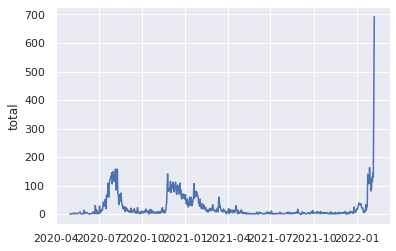

In [187]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x=nopendingdiffdf.index, y='total',
             data=nopendingdiffdf)

## Correlation

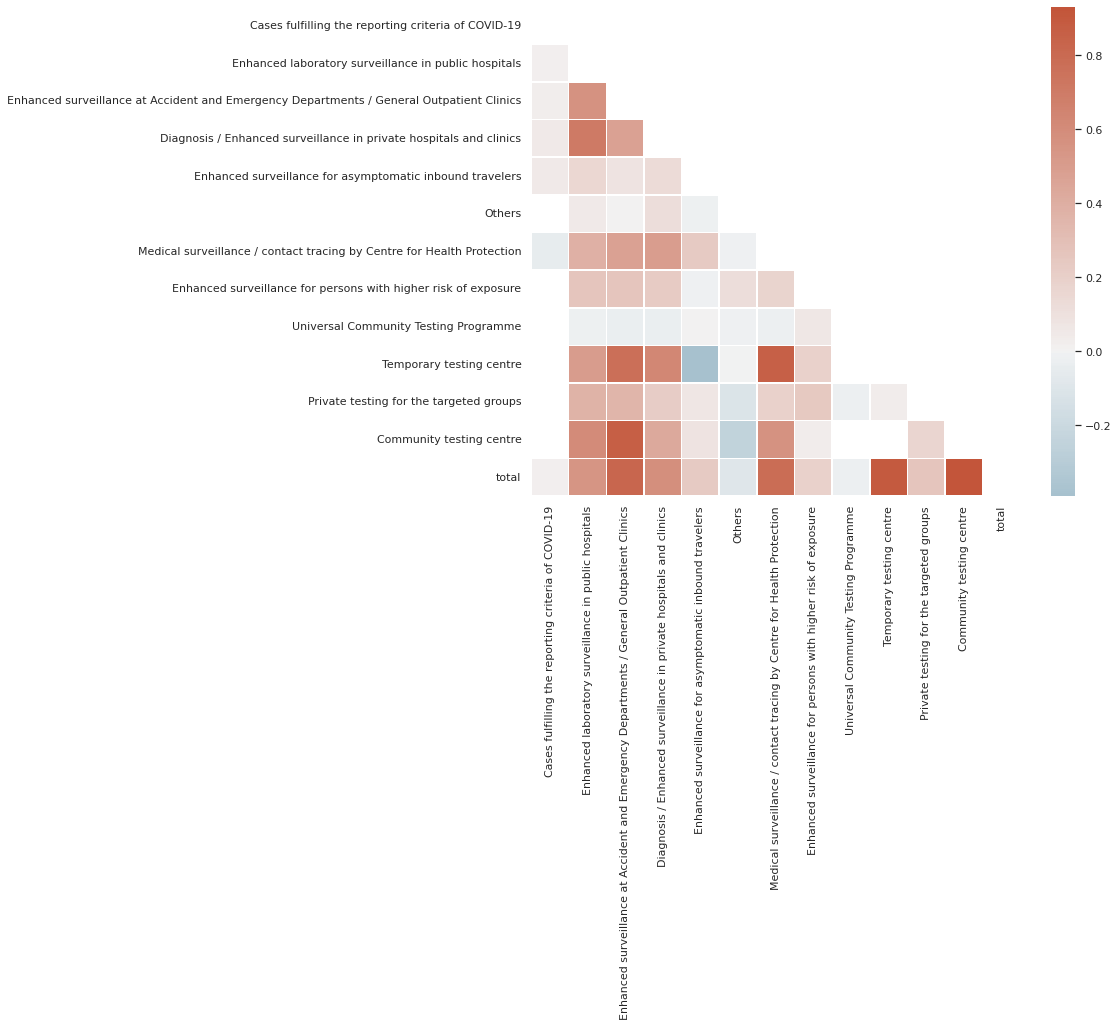

In [188]:
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = nopendingdiffdf.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

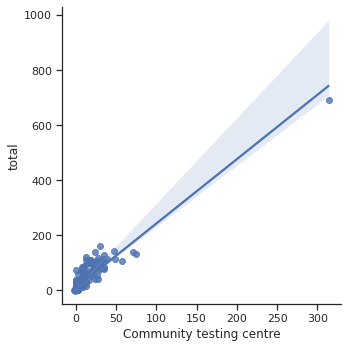

In [195]:
sns.set_theme(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="Community testing centre", y="total", data=nopendingdiffdf)